<a href="https://colab.research.google.com/github/rajainnamuri/Twitter-bot-detection/blob/main/Twitter_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset
df = pd.read_excel("/content/sample_data/twitter_bots.xlsx")
df

,source,author_follower_count,author_followings_count,author_favourites_count,author_statuses_count,author_verified,author_created_at,2020_or_later,default_profile,account_has_location,account_has_url,followers_followings_ratio,last_five_tweets_rts_mean,last_five_tweets_favs_mean,last_five_rts_favs_ratio,suspicious_source,posted_more_than_once,posted_by_other,is_a_bot
0,Twitter Web App,2,57,36,51,False,2023-02-17 18:59:56,True,True,True,False,0.035088,0.000000,1.2,0.000000,False,False,False,True
1,Twitter for Android,369,1034,1149,8079,False,2011-04-16 11:41:50,False,False,True,True,0.356867,0.000000,0.0,0.000000,False,False,False,False
2,"Cheap Bots, Done Quick!",447,49,5,9134,False,2021-10-12 10:28:22,True,True,True,True,9.122449,0.000000,3.8,0.000000,True,True,False,True
3,Twitter Web App,1,0,0,484,False,2022-11-09 17:33:04,True,True,False,True,0.000000,0.000000,0.0,0.000000,False,True,False,True
4,Twitter Web App,1130,161,1215,1982,False,2021-12-27 04:59:50,True,True,False,False,7.018634,0.000000,4.0,0.000000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Twitter Web App,1038893,5446,460585,261958,True,2007-11-28 19:10:12,False,False,True,True,190.762578,22.000000,405.6,0.054241,False,False,False,False
1016,Twitter Media Studio,5274795,265,3073,42635,True,2018-04-16 16:23:28,False,True,True,True,19904.886792,216.666667,1805.0,0.120037,True,False,False,False
1017,Twitter for Android,277,371,12036,1488,False,2021-05-18 14:28:40,True,True,False,False,0.746631,0.000000,1.6,0.000000,False,False,False,False
1018,Twitter for Android,92,440,17288,5263,False,2020-11-18 04:32:09,True,True,True,False,0.209091,0.000000,34.8,0.000000,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   source                      1020 non-null   object        
 1   author_follower_count       1020 non-null   int64         
 2   author_followings_count     1020 non-null   int64         
 3   author_favourites_count     1020 non-null   int64         
 4   author_statuses_count       1020 non-null   int64         
 5   author_verified             1020 non-null   bool          
 6   author_created_at           1020 non-null   datetime64[ns]
 7   2020_or_later               1020 non-null   bool          
 8   default_profile             1020 non-null   bool          
 9   account_has_location        1020 non-null   bool          
 10  account_has_url             1020 non-null   bool          
 11  followers_followings_ratio  1020 non-null   float64     

In [ ]:
bot_counts = df["is_a_bot"].value_counts()

# Display results
print(f"Number of Bots: {bot_counts[1]}")
print(f"Number of Non-Bots: {bot_counts[0]}")

Number of Bots: 510
Number of Non-Bots: 510


<ipython-input-5-484e1122b22d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of Bots: {bot_counts[1]}")
<ipython-input-5-484e1122b22d>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of Non-Bots: {bot_counts[0]}")


In [ ]:
# Drop unnecessary columns
df.drop(columns=['source'], inplace=True)

# Drop 'author_created_at'
df.drop(columns=['author_created_at'], inplace=True)

# Identify categorical columns
categorical_cols = ['default_profile', 'account_has_location', 'account_has_url',
                    'suspicious_source', 'posted_more_than_once', 'posted_by_other', 'author_verified','is_a_bot']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Define features (X) and target variable (y)
y = df['is_a_bot']
X = df.drop(columns=['is_a_bot'])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


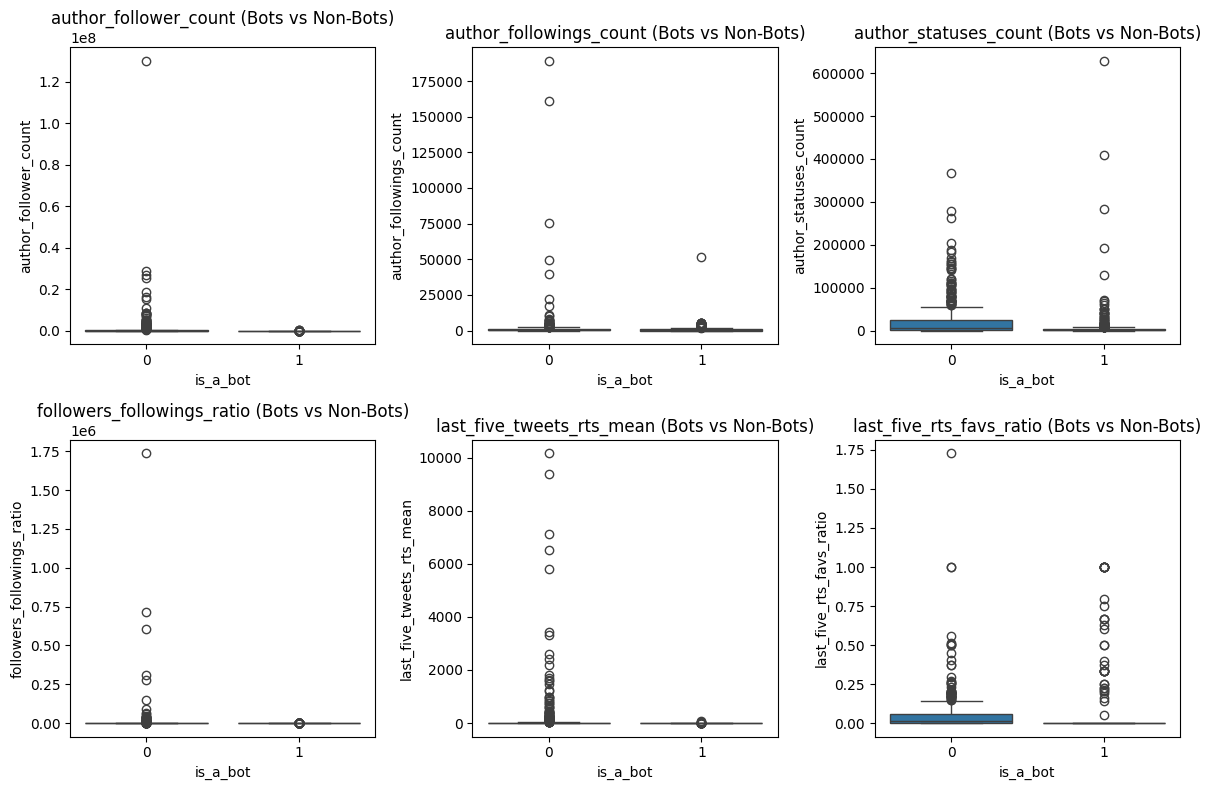

In [ ]:
# Important features to compare
important_features = [
    "author_follower_count", "author_followings_count", "author_statuses_count",
    "followers_followings_ratio", "last_five_tweets_rts_mean", "last_five_rts_favs_ratio"
]

# Plot boxplots for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["is_a_bot"], y=df[feature])
    plt.title(f"{feature} (Bots vs Non-Bots)")

plt.tight_layout()
plt.show()


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

Logistic Regression Accuracy: 0.8676


In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9020


In [ ]:
svm = SVC(probability=True, kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.8725


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp:.4f}")

MLP Accuracy: 0.8725


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.8971


In [ ]:
from textblob import TextBlob

# Reload dataset for Feature Engineering
df = pd.read_excel("/content/sample_data/twitter_bots.xlsx")

# Drop unnecessary columns
df.drop(columns=['source'], inplace=True)

# Account-Based Features
df['account_age_days'] = (pd.to_datetime("today") - df['author_created_at']).dt.days  # Compute account age

# Tweet-Based Features
df['avg_tweet_length'] = df['last_five_tweets_rts_mean'].apply(lambda x: len(str(x)))  # Approximate tweet length

# Activity-Based Features
df['tweets_per_day'] = df['author_statuses_count'] / (df['account_age_days'] + 1)  # Avoid division by zero
df['active_hours'] = df['author_created_at'].dt.hour.apply(lambda x: 1 if (x > 22 or x < 6) else 0)  # Night tweets = bot-like

# Drop 'author_created_at' after extracting account age
df.drop(columns=['author_created_at'], inplace=True)

# Extract sentiment score
df["sentiment_score"] = df["last_five_tweets_rts_mean"].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Apply Label Encoding
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Define features (X) and target variable (y)
y = df['is_a_bot']
X = df.drop(columns=['is_a_bot'])

# Standardize numerical features
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
df

,author_follower_count,author_followings_count,author_favourites_count,author_statuses_count,author_verified,2020_or_later,default_profile,account_has_location,account_has_url,followers_followings_ratio,...,last_five_rts_favs_ratio,suspicious_source,posted_more_than_once,posted_by_other,is_a_bot,account_age_days,avg_tweet_length,tweets_per_day,active_hours,sentiment_score
0,2,57,36,51,0,True,1,1,0,0.035088,...,0.000000,0,0,0,1,808,3,0.063041,0,0.0
1,369,1034,1149,8079,0,False,0,1,1,0.356867,...,0.000000,0,0,0,0,5134,3,1.573320,0,0.0
2,447,49,5,9134,0,True,1,1,1,9.122449,...,0.000000,1,1,0,1,1302,3,7.009977,0,0.0
3,1,0,0,484,0,True,1,0,1,0.000000,...,0.000000,0,1,0,1,908,3,0.532453,0,0.0
4,1130,161,1215,1982,0,True,1,0,0,7.018634,...,0.000000,0,0,0,0,1226,3,1.615322,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1038893,5446,460585,261958,1,False,0,1,1,190.762578,...,0.054241,0,0,0,0,6368,4,41.130162,0,0.0
1016,5274795,265,3073,42635,1,False,1,1,1,19904.886792,...,0.120037,1,0,0,0,2577,17,16.538014,0,0.0
1017,277,371,12036,1488,0,True,1,0,0,0.746631,...,0.000000,0,0,0,0,1449,3,1.026207,0,0.0
1018,92,440,17288,5263,0,True,1,1,0,0.209091,...,0.000000,0,0,0,0,1630,3,3.226855,1,0.0


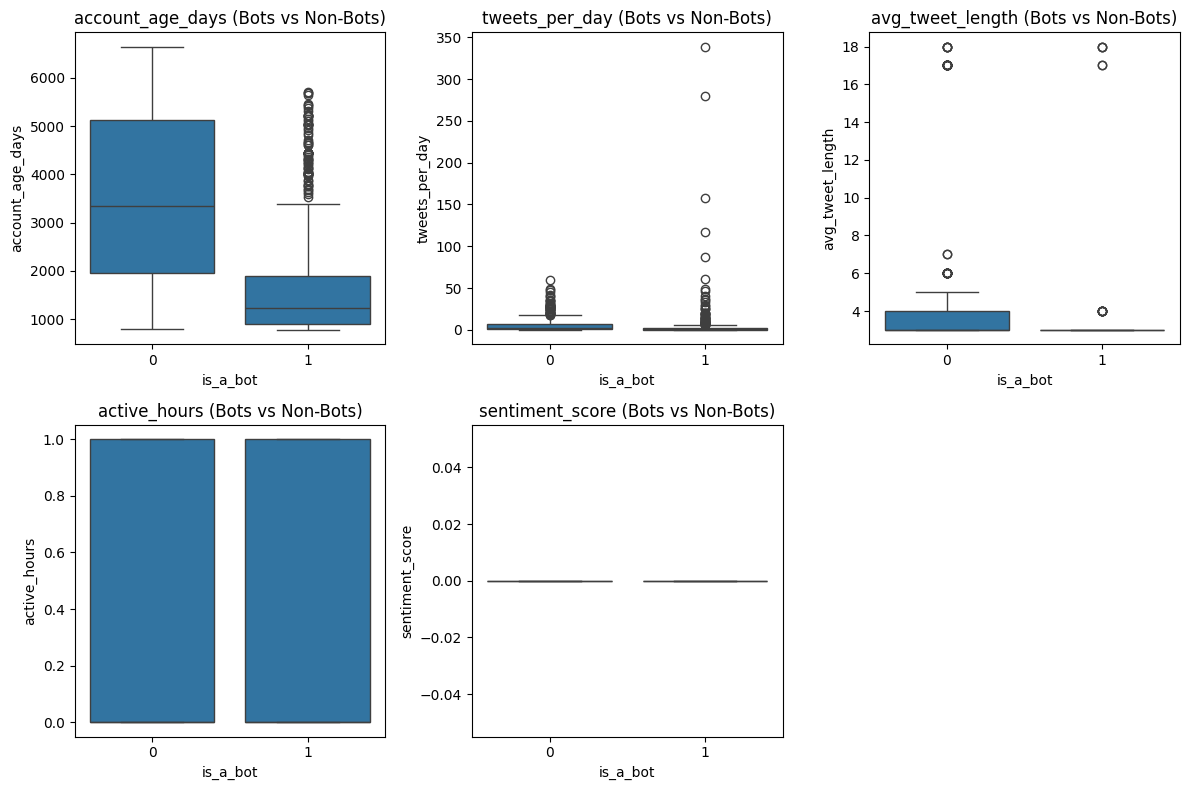

In [ ]:
# Important Features After Feature Engineering
new_features = ["account_age_days", "tweets_per_day", "avg_tweet_length", "active_hours","sentiment_score"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(new_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["is_a_bot"], y=df[feature])
    plt.title(f"{feature} (Bots vs Non-Bots)")

plt.tight_layout()
plt.show()


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

accuracy_lr2 = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr2:.4f}")

Logistic Regression Accuracy: 0.8775


In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
accuracy_rf2 = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf2:.4f}")

Random Forest Accuracy: 0.9167


In [ ]:
svm = SVC(probability=True, kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

accuracy_svm2 = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm2:.4f}")

SVM Accuracy: 0.8775


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
accuracy_mlp2 = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp2:.4f}")

MLP Accuracy: 0.8873


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
accuracy_xgb2 = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb2:.4f}")

XGBoost Accuracy: 0.8824


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Store accuracy scores
accuracy_before = {
    "Logistic Regression": accuracy_lr,
    "Decision Tree": accuracy_rf,
    "Random Forest": accuracy_rf,
    "SVM": accuracy_svm,
    "MLP": accuracy_mlp,
    "XGBoost": accuracy_xgb
}

accuracy_after = {
    "Logistic Regression": accuracy_lr2,
    "Decision Tree": accuracy_rf2,
    "Random Forest": accuracy_rf2,
    "SVM": accuracy_svm2,
    "MLP": accuracy_mlp2,
    "XGBoost": accuracy_xgb2
}

# Convert to DataFrame
df_accuracy = pd.DataFrame({
    "Before Feature Engineering": accuracy_before,
    "After Feature Engineering": accuracy_after
})

# Reset index for plotting
df_accuracy = df_accuracy.reset_index().rename(columns={"index": "Model"})


<Figure size 1000x600 with 0 Axes>

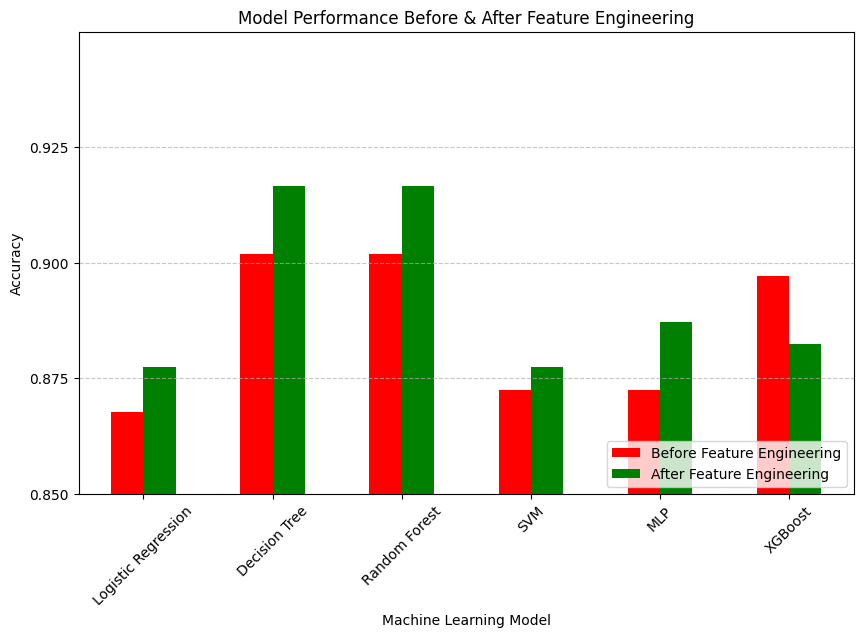

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot bar chart
plt.figure(figsize=(10, 6))
df_accuracy.set_index("Model").plot(kind="bar", figsize=(10, 6), color=["red", "green"])

# Set title and labels
plt.title("Model Performance Before & After Feature Engineering")
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
plt.xticks(rotation=45)

# Set y-axis limits (starting from 0.85)
plt.ylim(0.85, 0.95)  # Adjust range as needed

# Set y-axis ticks from 0.85 to 1.0 with 0.05 intervals
plt.yticks(np.arange(0.85, 0.95, 0.025))

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add legend
plt.legend(["Before Feature Engineering", "After Feature Engineering"], loc="lower right")

# Show plot
plt.show()
